--- Analyse des Seuils de Risque par Grade ---
✅ Données et modèle neutre chargés.
✅ Scores de risque neutres calculés.

--- Distribution des Scores de Risque par Grade ---


,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,60795.0,0.106292,0.054265,0.018690,0.067113,0.093896,0.132647,0.499104
B,110217.0,0.155314,0.072536,0.023030,0.101951,0.140441,0.193943,0.650669
C,98658.0,0.206296,0.095473,0.024212,0.133792,0.189375,0.260673,0.696770
D,57519.0,0.247582,0.110907,0.028034,0.162695,0.228928,0.315823,0.788907
E,28421.0,0.307422,0.119300,0.030521,0.216425,0.297885,0.392241,0.812523
F,9516.0,0.343769,0.118730,0.042536,0.256364,0.339583,0.428635,0.761359
G,1088.0,0.351079,0.115303,0.076472,0.268715,0.343845,0.431017,0.774017


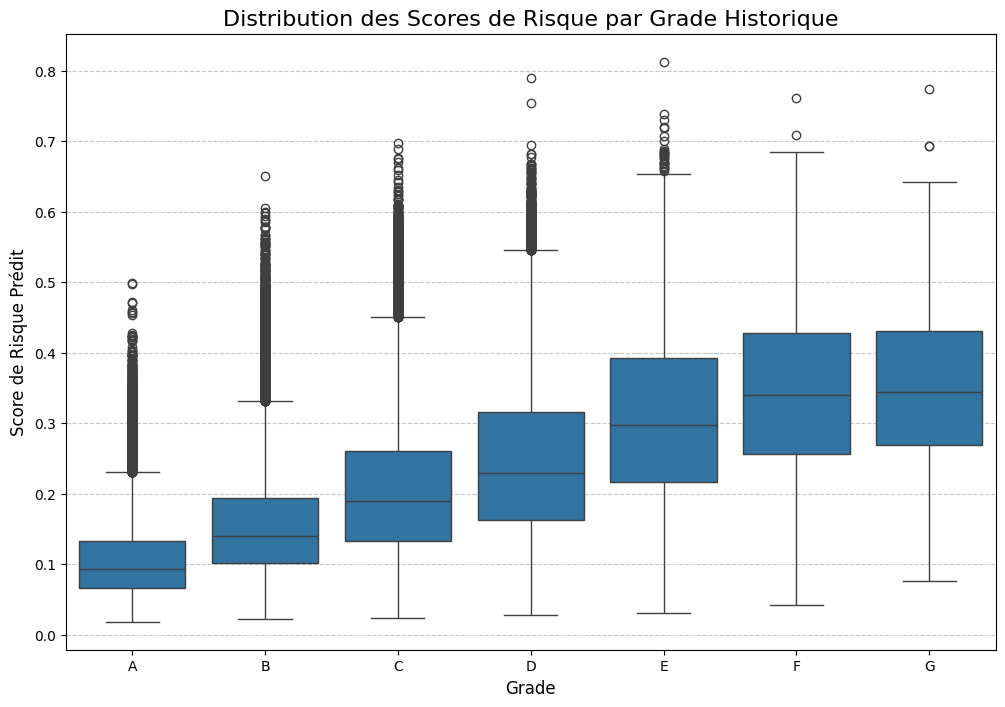

In [ ]:
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Analyse des Seuils de Risque par Grade ---")

# --- 1. Chargement des données et du modèle de risque neutre ---
input_path = "../../data/processed/dataset_clean_no_outliers.parquet"
model_path = "../../models/step1_risk_model_NEUTRAL.pkl"
model_cols_path = "../../models/step1_risk_model_columns.pkl"

df = pd.read_parquet(input_path)
model_neutral = joblib.load(model_path)
model_columns = joblib.load(model_cols_path)
print("✅ Données et modèle neutre chargés.")

# --- 2. Calcul du score de risque pour toute la base ---
# On prépare les données comme pour l'entraînement du modèle
features_to_select = [
    'term', 'annual_inc', 'dti', 'revol_util', 'revol_bal', 'loan_amnt', 
    'emp_length', 'home_ownership', 'purpose', 'verification_status', 
    'mort_acc', 'pub_rec', 'open_acc', 'total_acc'
]
X_full = df[features_to_select]
X_full = pd.get_dummies(X_full, drop_first=True, dtype=float)
X_full = X_full.reindex(columns=model_columns, fill_value=0)

df['risk_score_neutral'] = model_neutral.predict_proba(X_full)[:, 1]
print("✅ Scores de risque neutres calculés.")

# --- 3. Analyse Statistique de la Distribution ---
# On calcule les statistiques (moyenne, médiane, quartiles...) du score pour chaque grade
risk_distribution = df.groupby('grade')['risk_score_neutral'].describe()

print("\n--- Distribution des Scores de Risque par Grade ---")
display(risk_distribution)


# --- 4. Analyse Visuelle ---
# Un boxplot est idéal pour visualiser les plages de score pour chaque grade
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='grade', y='risk_score_neutral', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.title("Distribution des Scores de Risque par Grade Historique", fontsize=16)
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Score de Risque Prédit", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()